<a href="https://colab.research.google.com/github/vvrgit/Udemy-Oprimization-Basics/blob/main/BGD_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

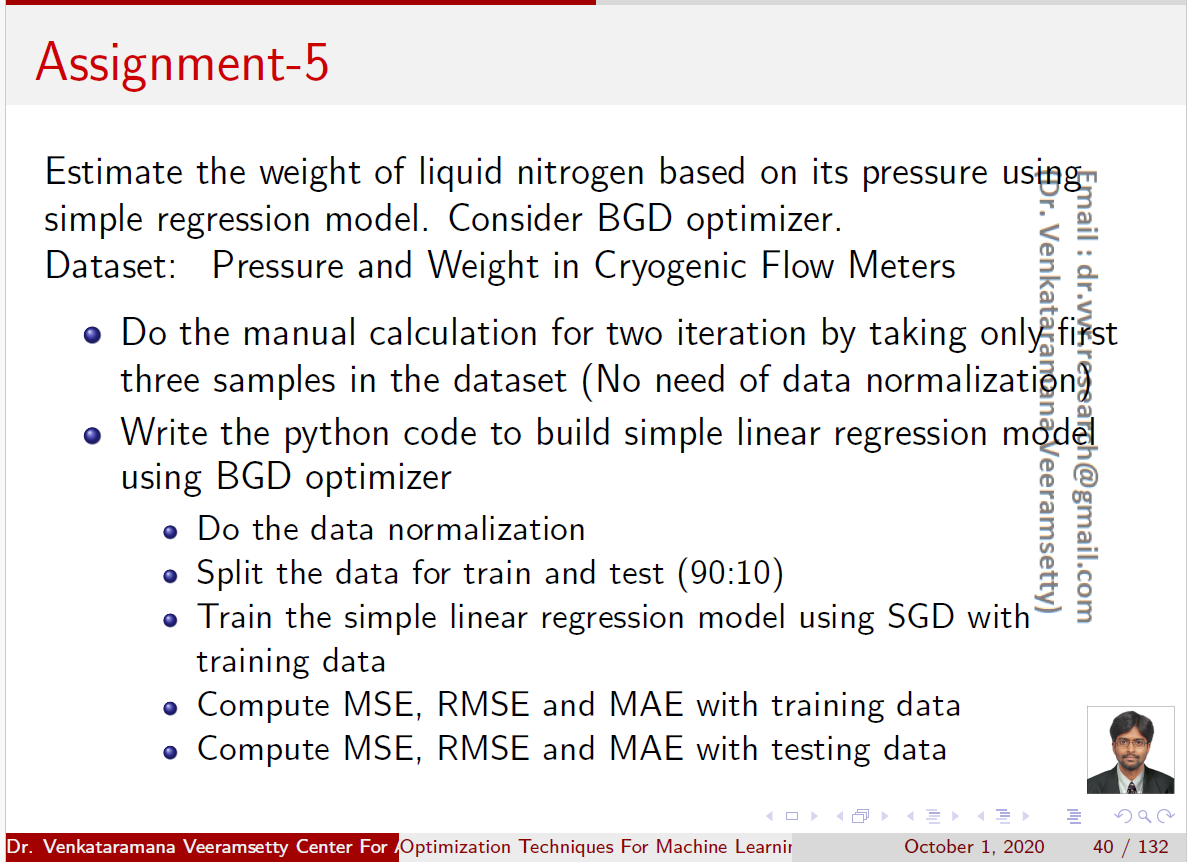

In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
data=pd.read_excel("/content/Nitrogen.xlsx")
data.head()

,Pressure,Weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [ ]:
data.describe()

,Pressure,Weight
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Pressure' and 'Weight' columns
data[['Pressure', 'Weight']] = scaler.fit_transform(data[['Pressure', 'Weight']])

print("Normalized Data:")
display(data.head())

Normalized Data:


,Pressure,Weight
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Pressure,data.Weight,test_size=0.1,random_state=42)

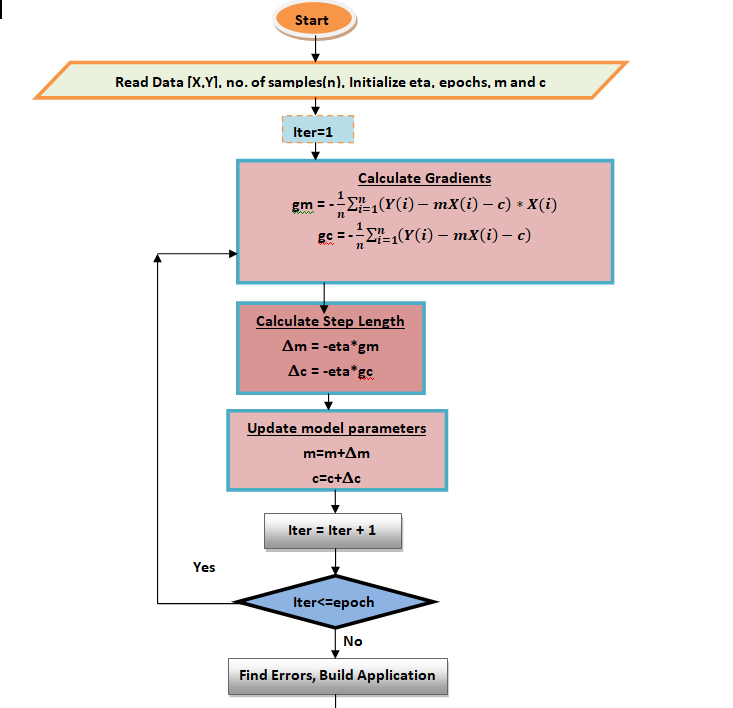

In [ ]:
Ns=X_train.shape[0]
eta=0.01
epochs=1000
m=random.uniform(-1,1)
c=random.uniform(-1,1)

In [ ]:
for iter in range(epochs):
  Gm=0
  Gc=0
  for sample in range(Ns):
    Gm=Gm+(y_train.iloc[sample]-m*X_train.iloc[sample]-c)*X_train.iloc[sample]
    Gc=Gc+(y_train.iloc[sample]-m*X_train.iloc[sample]-c)
  gm=-Gm/Ns
  gc=-Gc/Ns
  delm=-eta*gm
  delc=-eta*gc
  m=m+delm
  c=c+delc
print("m=",m)
print("c=",c)

m= -0.24900936694843007
c= 0.7635341769485993


In [ ]:
y_train_pred=m*X_train+c
mse=((y_train-y_train_pred)**2).mean()
print("MSE-train=",mse)

MSE-train= 0.052719309814673744


In [ ]:
y_test_pred=m*X_test+c
mse=((y_test-y_test_pred)**2).mean()
print("MSE-test=",mse)

MSE-test= 0.014491842352238013


In [ ]:
Pressure=input("Enter Pressure of Nitorgen Gas")
Pressure=float(Pressure)
Pressure=(Pressure-62.2)/(120-62.2)
Weight=m*Pressure+c
Weight=Weight*(578.6-406.7)+406.7
print("Weight of Nitrogen Gas=",Weight)

Enter Pressure of Nitorgen Gas75.1
Weight of Nitrogen Gas= 528.3982246489207
